## Credit Card Fraud transaction: Classification Project

In [1]:
#import libraries
import numpy as mp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
df=pd.read_csv('creditcard.csv')

In [3]:
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
93308,64345.0,-0.382079,1.064281,1.306673,-0.052272,0.054160,-0.658391,0.599340,0.088309,-0.614876,...,-0.215063,-0.598919,-0.022563,0.270596,-0.199256,0.055429,0.239846,0.087485,4.47,0
32617,36885.0,-0.073869,-0.030639,0.272989,-1.667983,-0.165959,0.844026,-1.304355,-2.549358,-1.032304,...,-1.310917,0.096079,-0.228051,-1.335396,0.946891,-0.286159,0.064628,0.220411,61.90,0
211909,138624.0,1.949502,-0.418971,-0.339571,0.303737,-0.482872,0.112081,-0.735857,0.153819,1.132648,...,0.243951,0.917297,0.146367,0.799286,-0.097212,-0.269902,0.036653,-0.038999,4.99,0
180079,124367.0,1.967721,0.015784,-1.175703,1.267217,0.353024,-0.093750,0.073299,-0.069822,0.312340,...,0.225417,0.928694,-0.029492,0.808718,0.445570,-0.431696,0.010384,-0.055959,6.00,0
278048,168010.0,0.161769,1.073269,-0.477445,-0.597126,1.075852,-0.711042,0.997806,-0.128480,-0.117422,...,-0.350082,-0.827913,0.058075,0.385595,-0.374042,0.123598,0.226365,0.083369,0.89,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
print(df.shape)

(284807, 31)


In [6]:
null_v=df.isnull().sum()
#null_v

In [7]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
legit=df[df.Class==0]
fraud=df[df.Class==1]

In [9]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [10]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [12]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [13]:
#under sampling
legit_sample=legit.sample(n=492)
new_df=pd.concat([legit_sample,fraud],axis=0)

In [14]:
print(new_df.shape)

(984, 31)


In [15]:
x=new_df.drop(columns='Class',axis=1)
y=new_df['Class']

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [17]:
x1=df.drop(columns='Class',axis=1)
y1=df['Class']

In [18]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=4)

In [19]:
#model training
model=LogisticRegression()

In [20]:
model.fit(x1_train,y1_train)

C:\Users\sanyalam\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
#accuracy 
x1_train_pred=model.predict(x1_train)

In [22]:
accuracy_score(x1_train_pred,y1_train)

0.9989598191753165

In [23]:
x1_test_pred=model.predict(x1_test)

In [24]:
accuracy_score(x1_test_pred,y1_test)

0.9991573329588147

In [25]:
print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [26]:
#when train pred score > test pred score: overfitting

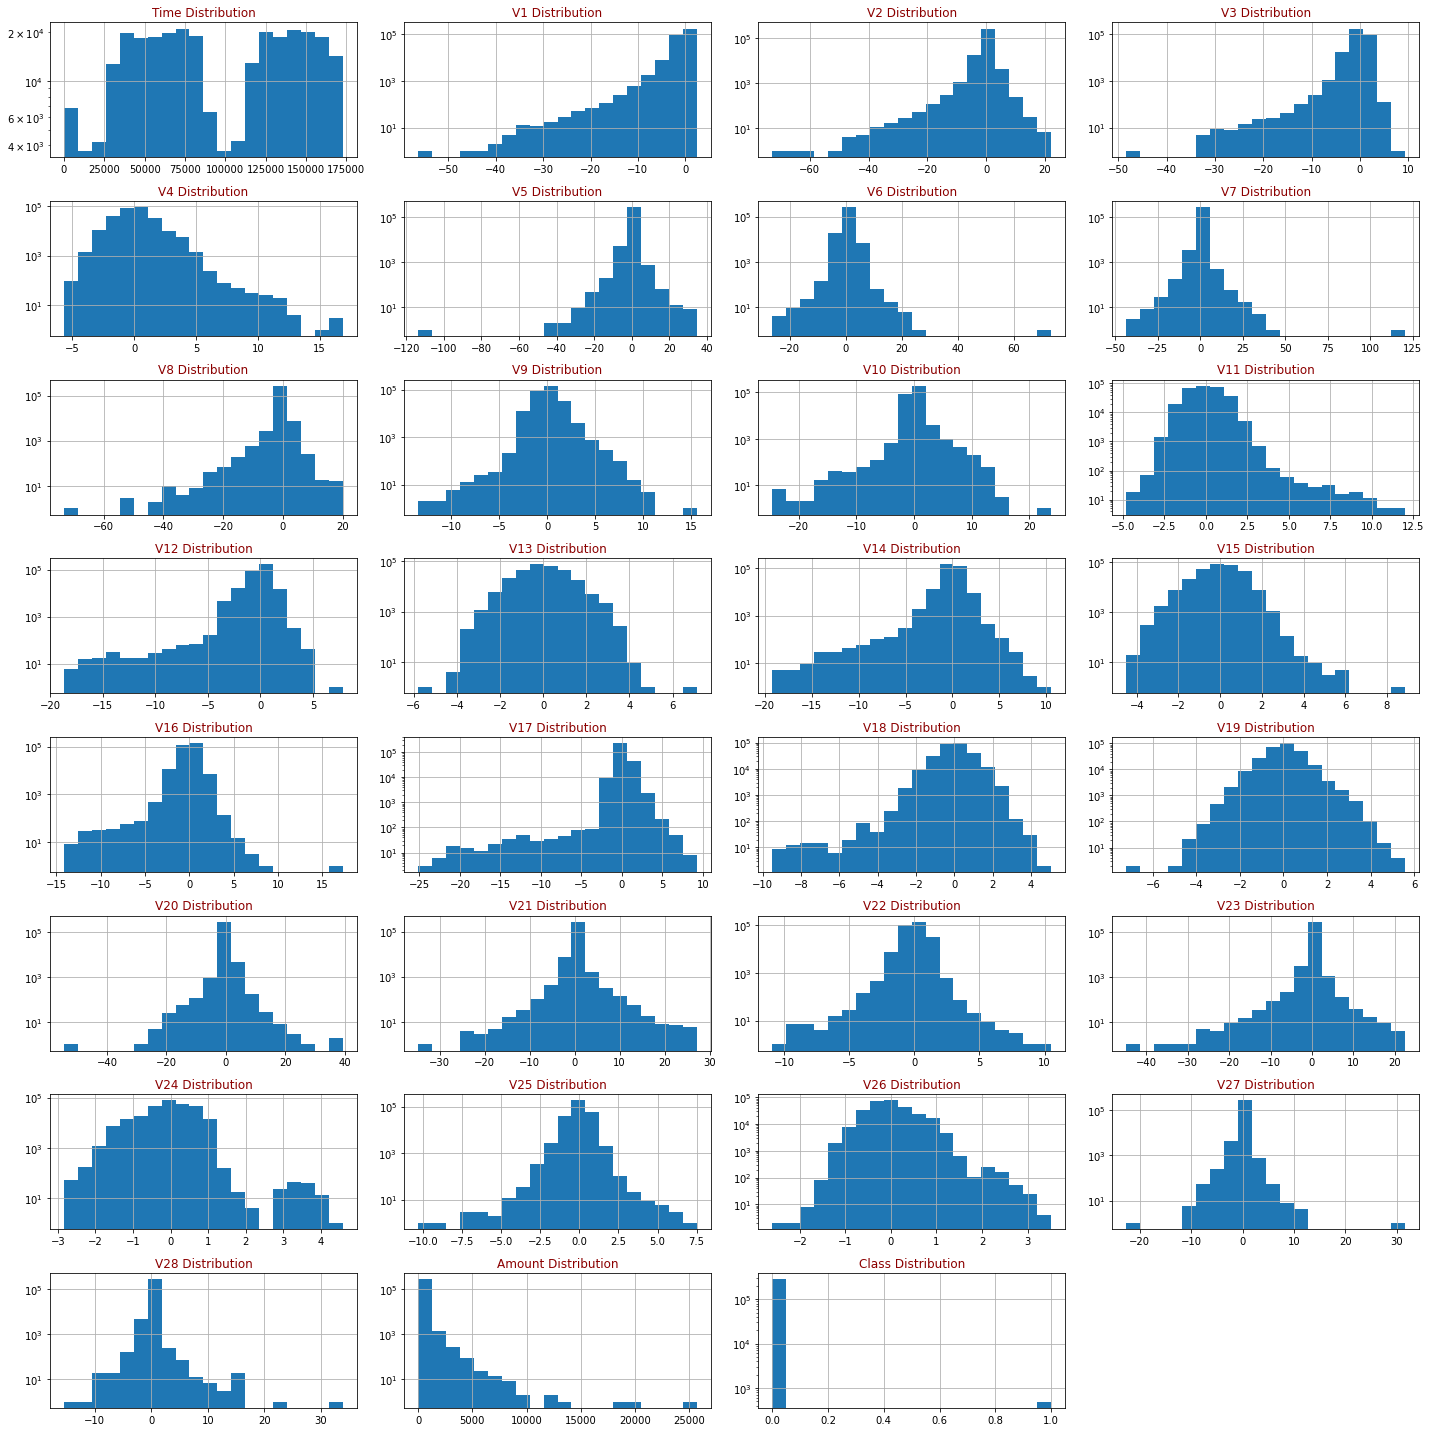

In [27]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax)
        ax.set_title(feature+" Distribution",color='DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()

draw_histograms(df,df.columns,8,4)

### Logistic Regression

In [28]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import numpy as np

In [29]:
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=5,random_state=None,shuffle=False)
log_class=LogisticRegression()

In [30]:
clf=GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_micro')
clf.fit(x1_train,y1_train)

C:\Users\sanyalam\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.99893787        nan 0.99899054        nan 0.99895104
        nan 0.99893349        nan 0.99889837]
  warnings.warn(


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_micro')

In [31]:
y_pred1=clf.predict(x1_test)

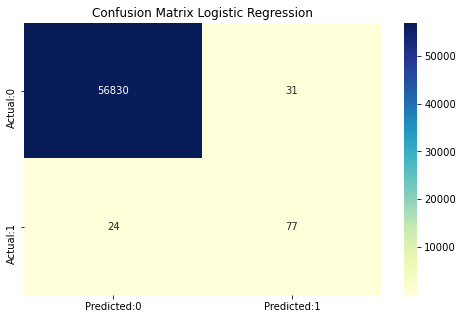

<Figure size 432x288 with 0 Axes>

In [32]:
# confusion Matrix
cm=confusion_matrix(y1_test,y_pred1)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
axes=sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");
axes.set_title('Confusion Matrix Logistic Regression')
plt.show()
plt.savefig('confusion_matrix.png')

In [33]:
print('The accuracy score using grid-search CV is : {}'.format(accuracy_score(y1_test,y_pred1)))

The accuracy score using grid-search CV is : 0.9990344440153085


In [34]:
print(classification_report(y1_test,y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.71      0.76      0.74       101

    accuracy                           1.00     56962
   macro avg       0.86      0.88      0.87     56962
weighted avg       1.00      1.00      1.00     56962



In [35]:
#true positive, false negative

### Random Forest Classifier

In [36]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [37]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()

In [ ]:
rf_model.fit(x1_train,y1_train)

In [ ]:
y_pred=rf_model.predict(x1_test)

In [ ]:
print('The accuracy score using random forest is : {}'.format(accuracy_score(y1_test,y_pred)))

In [ ]:
cm=confusion_matrix(y1_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Actual:0','Actual:1'],index=['Predicted:0','Predicted:1'])
axes=sns.heatmap(conf_matrix,annot=True)
axes.set_title('Confusion Matrix Random Forest Regressor')

In [ ]:
print(classification_report(y_pred,y1_test))

### Performing under sampling

In [ ]:
from collections import Counter
Counter(y1_train)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler  
under_sampler = RandomUnderSampler()
x_res, y_res = under_sampler.fit_resample(x1, y1)
print("The number of classes before fit {}".format(Counter(y1_train)))
print("The number of classes after fit {}".format(Counter(y_res)))

### Random Forest

In [ ]:
rf_classifier=RandomForestClassifier()
rf_classifier.fit(x_res,y_res)

In [ ]:
y_pred_rs=rf_classifier.predict(x1_test)

In [ ]:
# confusion Matrix
cm=confusion_matrix(y1_test,y_pred_rs)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [ ]:
print(accuracy_score(y1_test,y_pred_rs))

### CatBoost: Overfitting Detector

In [ ]:
##mapping categorical features
default_df = df.dropna() 
features = [feat for feat in list(default_df) if feat != 'Class']
print(features)
card_categories = np.where(default_df[features].dtypes != np.float)[0]
card_categories

In [ ]:
SEED = 1234

from catboost import CatBoostClassifier 


params = {'iterations':5000,
        'learning_rate':0.01,
        'cat_features':card_categories,
        'depth':3,
        'eval_metric':'AUC',
        'verbose':200,
        'od_type':"Iter", # overfit detector
        'od_wait':500, # most recent best iteration to wait before stopping
        'random_seed': SEED
          }

cat_model = CatBoostClassifier(**params)
cat_model.fit(x1_train, y1_train,   
          eval_set=(x1_test, y1_test), 
          use_best_model=True, # True if we don't want to save trees created after iteration with the best validation score
          plot=True  
         );

In [ ]:
RANDOM_STATE = 2018
NUM_ESTIMATORS = 100
target = 'Class'
predictors = df.drop(columns='Class',axis=1)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(random_state=RANDOM_STATE,
                         algorithm='SAMME.R',
                         learning_rate=0.8,
                             n_estimators=NUM_ESTIMATORS)

In [ ]:
clf.fit(predictors,df['Class'].values)

In [ ]:
y_ada_pred = clf.predict(predictors)

In [ ]:
cm = pd.crosstab(df[target].values, y_ada_pred, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=8)
plt.show()

In [39]:
df['Label']=np.where(df['Class']==1,'Fraud','Okay')

In [40]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Label
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,Okay
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,Okay
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,Okay
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,Okay
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,Okay


<AxesSubplot:xlabel='V5', ylabel='V12'>

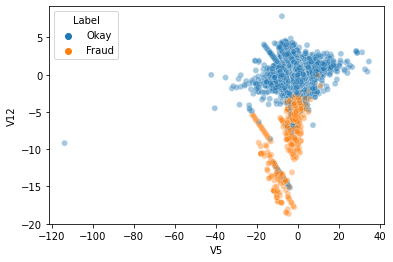

In [41]:
import seaborn as sns
sns.scatterplot(x='V5',y='V12',data=df,alpha=0.4,hue='Label')

In [42]:
#pairplot
attributes=df[['V1','V2','V3','V4','V5','Label']]
sns.pairplot(attributes,hue='Label',corner=True)

Error in callback <function flush_figures at 0x0000028B8A5D3700> (for post_execute):


KeyboardInterrupt: 

In [46]:
df1=df.drop(columns=['Time','Class','Amount','Label'],axis=1)

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans

In [50]:
n_clust=5
kmeans=KMeans(n_clusters=n_clust)
kmeans.fit(df1)
labels=kmeans.labels_

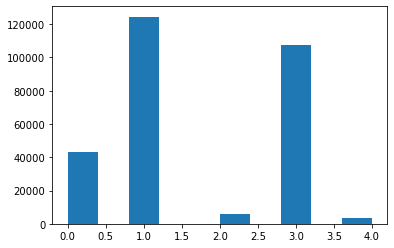

In [51]:
plt.hist(labels);

In [57]:
for clusterNum in range(n_clust):
    nums=np.where(labels==clusterNum)
    cluster_df=df.iloc[nums]
    means=cluster_df.mean()
    percent_fraud=means['Class']
    print('Cluster {:2d} contains {:.1%} fraud'.format(clusterNum,percent_fraud))

Cluster  0 contains 0.0% fraud
Cluster  1 contains 0.1% fraud
Cluster  2 contains 3.4% fraud
Cluster  3 contains 0.1% fraud
Cluster  4 contains 0.4% fraud
